In [ ]:
# !pip install tensorflow

In [41]:
import tensorflow as tf
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential 




import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

tf.__version__

'2.15.0'

In [10]:
df = pd.read_csv('data/Cleaned/Cleaned_channelData.csv')
df.head()

,Unnamed: 0,channel_name,Subscribers,Viewers,Videos_made,channel_description,start_year,start_month,start_day,start_time,start_hour,start_minute,start_second
0,0,Zee TV,72500000,7.649366e+10,134822,"Launched in 1992, ZEE TV is the pioneer of tel...",2005,12,11,06:23:26,6,23,26
1,1,T-Series,249000000,2.328870e+11,19492,"""Music can change the world"". T-Series is Indi...",2006,3,13,14:27:05,14,27,5
2,2,Cocomelon - Nursery Rhymes,165000000,1.682480e+11,1005,"At CoComelon, our primary goal has always been...",2006,9,1,22:18:49,22,18,49
3,3,SET India,162000000,1.517180e+11,118804,Sony Entertainment Television is one of the le...,2006,9,20,22:24:59,22,24,59
4,4,WWE,97100000,7.877977e+10,71268,WWE on YouTube is your number one spot to catc...,2007,5,11,01:20:02,1,20,2


In [14]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [15]:
df.shape

(4334, 12)

In [18]:
df.columns

Index(['channel_name', 'Subscribers', 'Viewers', 'Videos_made',
       'channel_description', 'start_year', 'start_month', 'start_day',
       'start_time', 'start_hour', 'start_minute', 'start_second'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4334 entries, 0 to 4333
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   channel_name         4334 non-null   object 
 1   Subscribers          4334 non-null   int64  
 2   Viewers              4334 non-null   float64
 3   Videos_made          4334 non-null   int64  
 4   channel_description  3962 non-null   object 
 5   start_year           4334 non-null   int64  
 6   start_month          4334 non-null   int64  
 7   start_day            4334 non-null   int64  
 8   start_time           4334 non-null   object 
 9   start_hour           4334 non-null   int64  
 10  start_minute         4334 non-null   int64  
 11  start_second         4334 non-null   int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 406.4+ KB


In [147]:
features = ['Subscribers', 'Viewers', 'Videos_made']#, 'start_month', 'start_hour', 'start_second']

data = df[features].copy()


data.head()

,Subscribers,Viewers,Videos_made
0,72500000,7.649366e+10,134822
1,249000000,2.328870e+11,19492
2,165000000,1.682480e+11,1005
3,162000000,1.517180e+11,118804
4,97100000,7.877977e+10,71268


<Axes: xlabel='Subscribers', ylabel='Viewers'>

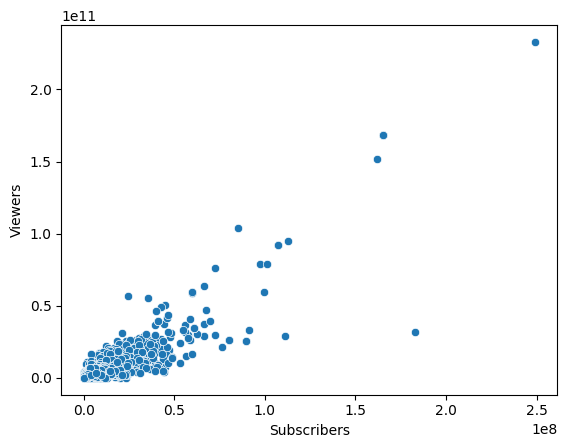

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data = data, x = 'Subscribers', y = 'Viewers')

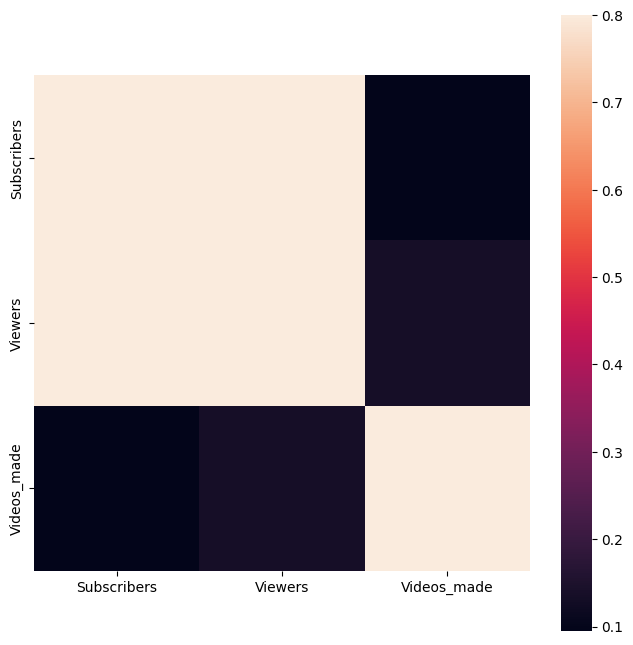

In [149]:
C_mat = data.corr()
fig = plt.figure(figsize = (8,8))
sns.heatmap(C_mat, vmax = .8, square = True)
plt.show()

In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4334 entries, 0 to 4333
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Subscribers  4334 non-null   int64  
 1   Viewers      4334 non-null   float64
 2   Videos_made  4334 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 101.7 KB


## Neural Networks

In [151]:
data.head()

,Subscribers,Viewers,Videos_made
0,72500000,7.649366e+10,134822
1,249000000,2.328870e+11,19492
2,165000000,1.682480e+11,1005
3,162000000,1.517180e+11,118804
4,97100000,7.877977e+10,71268


In [152]:
# Scaling the variables
## Normalizing
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled_df = pd.DataFrame(data_scaled, columns=data.columns)


X = data_scaled_df.drop('Viewers', axis = 1)
y = data_scaled_df[['Viewers']]
X.head()

,Subscribers,Videos_made
0,5.443431,3.515320
1,20.148462,0.300148
2,13.150034,-0.215233
3,12.900090,3.068769
4,7.492971,1.743560


In [153]:
y.head()

,Viewers
0,7.917503
1,24.968673
2,17.921246
3,16.119022
4,8.166752


In [154]:
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# y_scaled = scaler.fit_transform(y)

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [179]:
# Creating a model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation = 'relu', input_shape = (X_train.shape[1], )),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),

    tf.keras.layers.Dense(1, activation = 'linear')
])

In [180]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse', 'mae'])

In [181]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
87/87 [==============================] - 2s 6ms/step - loss: 0.3613 - mse: 0.3613 - mae: 0.2366 - val_loss: 0.1272 - val_mse: 0.1272 - val_mae: 0.1870
Epoch 2/100
87/87 [==============================] - 0s 3ms/step - loss: 0.2875 - mse: 0.2875 - mae: 0.2080 - val_loss: 0.1492 - val_mse: 0.1492 - val_mae: 0.2079
Epoch 3/100
87/87 [==============================] - 0s 3ms/step - loss: 0.3891 - mse: 0.3891 - mae: 0.2386 - val_loss: 0.2703 - val_mse: 0.2703 - val_mae: 0.2232
Epoch 4/100
87/87 [==============================] - 0s 3ms/step - loss: 0.2821 - mse: 0.2821 - mae: 0.2161 - val_loss: 0.1904 - val_mse: 0.1904 - val_mae: 0.2007
Epoch 5/100
87/87 [==============================] - 0s 4ms/step - loss: 0.3129 - mse: 0.3129 - mae: 0.2074 - val_loss: 0.1724 - val_mse: 0.1724 - val_mae: 0.2592
Epoch 6/100
87/87 [==============================] - 0s 3ms/step - loss: 0.2571 - mse: 0.2571 - mae: 0.2064 - val_loss: 0.1226 - val_mse: 0.1226 - val_mae: 0.1715
Epoch 7/100
87/87 [===

In [182]:
X_test.head()

,Subscribers,Videos_made
2439,-0.537726,-0.242275
1213,-0.166142,1.473060
2659,-0.239459,-0.217659
17,7.817898,-0.226719
3802,-0.591530,-0.239599


In [183]:
loss, mse, mae = model.evaluate(X_test, y_test)
print(f'Mean Absolute Error on Test Set: {mae}')

28/28 [==============================] - 0s 1ms/step - loss: 0.2921 - mse: 0.2921 - mae: 0.2157
Mean Absolute Error on Test Set: 0.2157234400510788


In [184]:
predictions = model.predict([[5.443431, 3.515320]])#(X_test[0:3])
predictions

1/1 [==============================] - 0s 117ms/step


array([[6.4980464]], dtype=float32)

In [185]:
X_test[0:3]

,Subscribers,Videos_made
2439,-0.537726,-0.242275
1213,-0.166142,1.473060
2659,-0.239459,-0.217659


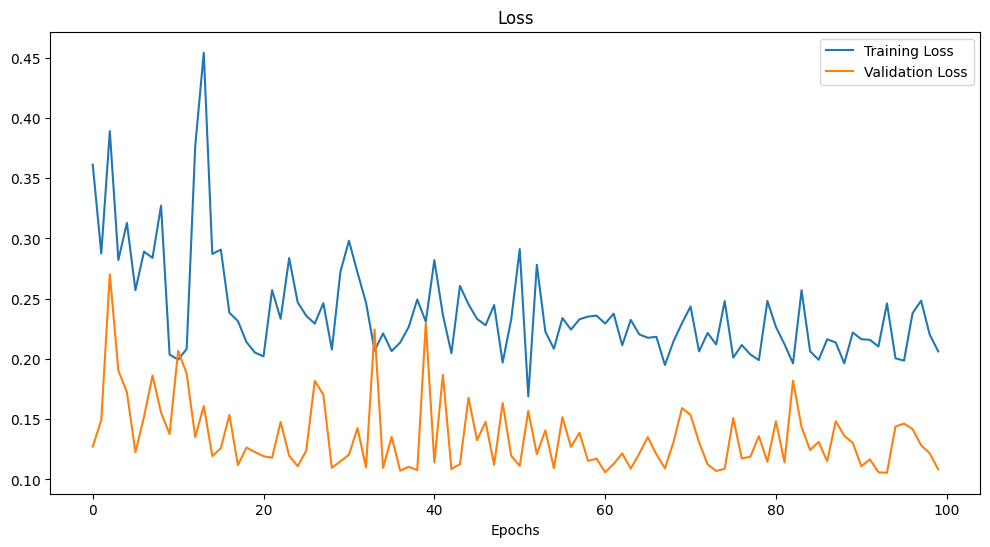

<Figure size 640x480 with 0 Axes>

In [186]:
# Plotting training history
plt.figure(figsize=(12, 6))

# Plot Loss

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

plt.tight_layout()


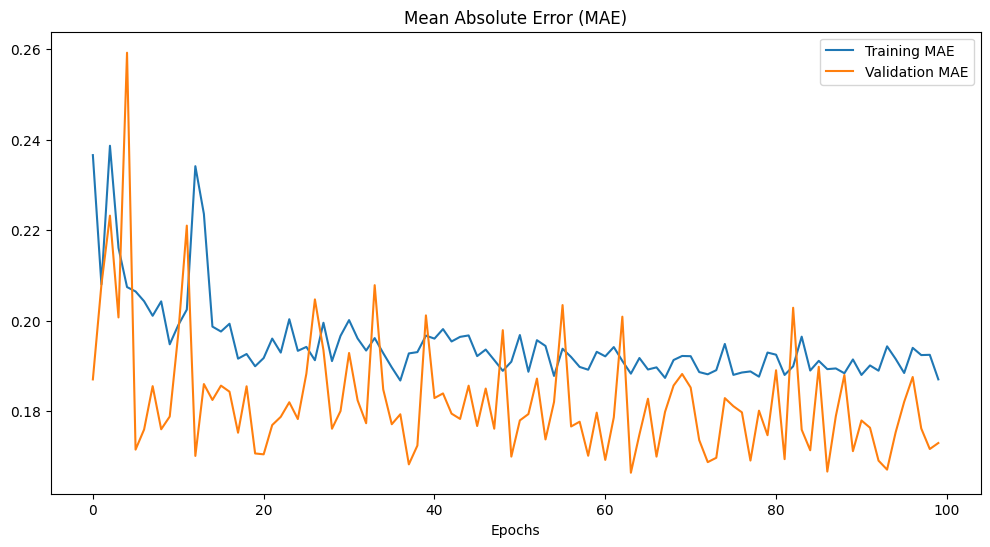

In [187]:
# Plot MSE
plt.figure(figsize=(12, 6))

plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.legend()
plt.show()



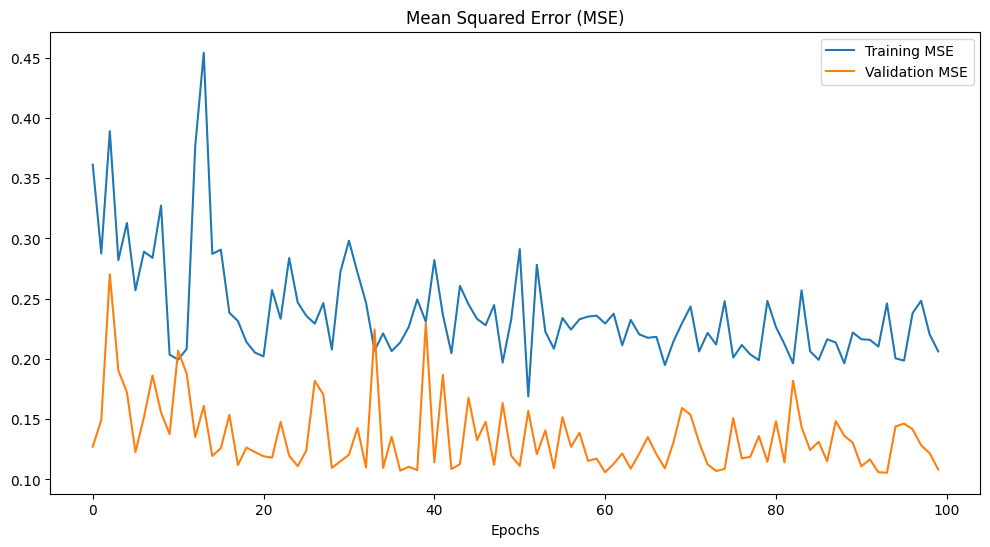

In [188]:
# Plot MAE
plt.figure(figsize=(12, 6))

plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epochs')
plt.legend()
plt.show()



In [165]:
print(history.history)

{'loss': [0.3704064190387726, 0.2630844712257385, 0.3276856541633606, 0.21548980474472046, 0.31728655099868774, 0.268658846616745, 0.22350440919399261, 0.26204198598861694, 0.28230583667755127, 0.21953792870044708, 0.21698534488677979, 0.2569379508495331, 0.20081239938735962, 0.22070257365703583, 0.2185124158859253, 0.21493472158908844, 0.3195343315601349, 0.21524007618427277, 0.26104840636253357, 0.21294823288917542, 0.26399368047714233, 0.2628915011882782, 0.21885618567466736, 0.2584582567214966, 0.22138148546218872, 0.2297855168581009, 0.22291073203086853, 0.21465404331684113, 0.2657548189163208, 0.24685780704021454, 0.23032799363136292, 0.21219244599342346, 0.2818197011947632, 0.22487889230251312, 0.22022922337055206, 0.23838375508785248, 0.2024913877248764, 0.2495442032814026, 0.22650986909866333, 0.26031896471977234, 0.2186436504125595, 0.23564282059669495, 0.19751526415348053, 0.24123530089855194, 0.23932316899299622, 0.21445266902446747, 0.2548598647117615, 0.23175665736198425,